In [96]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_json("usersessions/train.json")
# df_test = pd.read_json("usersessions/test.json")
# df = pd.concat([df_train, df_test])

In [98]:
df.describe()

,user_id
count,60000.000000
mean,99.543133
std,57.762998
min,0.000000
25%,49.000000
50%,100.000000
75%,149.000000
max,199.000000


In [99]:
df['country'] = df.apply(lambda x: x['location'].split('/')[0],axis=1)
df['city'] = df.apply(lambda x: x['location'].split('/')[1],axis=1)


In [100]:
history = df['sites'].apply(pd.Series)
df['number_of_sites'] = (~history.isna()).sum(axis=1)

In [101]:
df['is_Joe'] = df.apply(lambda x: 1 if x['user_id'] == 0 else 0, axis=1)

In [111]:
joe = df[df['user_id'] == 0]
joe.head()

,browser,os,locale,user_id,gender,location,sites,time,date,country,city,number_of_sites,is_Joe
146,Chrome,Windows 10,ru_RU,0,m,USA/Chicago,"[{'site': 'youtube.com', 'length': 71}, {'site...",18:26:00,2016-11-22,USA,Chicago,6,1
147,Firefox,Windows 10,ru_RU,0,m,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 140}, {...",16:57:00,2017-08-05,Canada,Toronto,6,1
272,Firefox,Windows 10,ru_RU,0,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 207}, {...",03:42:00,2017-02-19,USA,Chicago,9,1
531,Firefox,Ubuntu,ru_RU,0,m,France/Paris,"[{'site': 'vk.com', 'length': 56}, {'site': 's...",19:15:00,2016-04-08,France,Paris,8,1
605,Firefox,Windows 10,ru_RU,0,m,France/Paris,"[{'site': 'mail.google.com', 'length': 161}, {...",10:04:00,2016-06-19,France,Paris,12,1


In [123]:
def categorial_feature_overview(feature, rotation=0):
    print(feature, 'has', df[feature].isnull().sum() / len(df) * 100, '% of null values')
    f,ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].tick_params(labelrotation=rotation)
    ax[1].tick_params(labelrotation=rotation)
    sns.countplot(data=df, x=feature, ax=ax[0]);
    sns.boxplot(data=df, x=feature, y='number_of_sites', ax=ax[1])
    plt.show()

browser has 0.0 % of null values


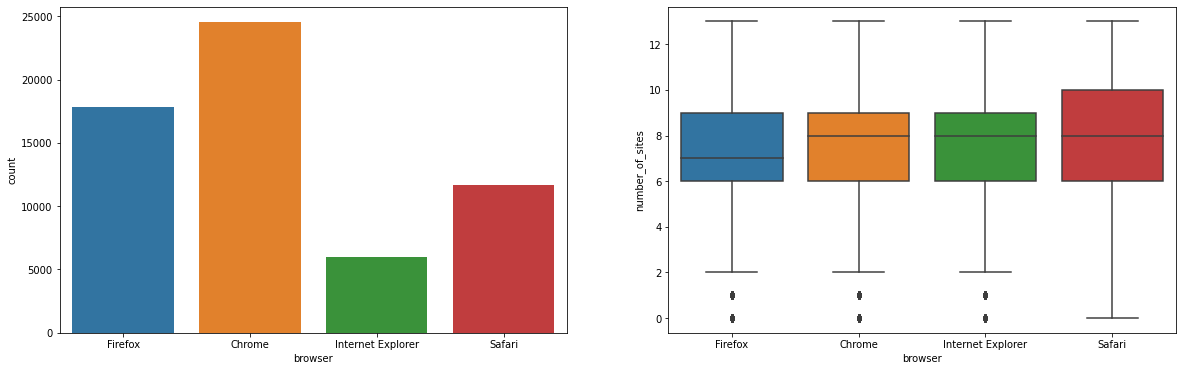

In [124]:
categorial_feature_overview('browser')

os has 0.0 % of null values


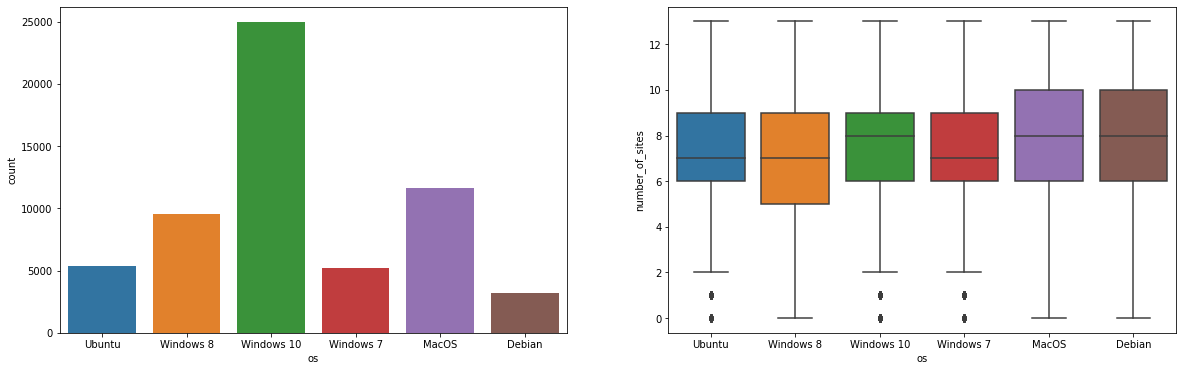

In [118]:
categorial_feature_overview('os')

locale has 0.0 % of null values


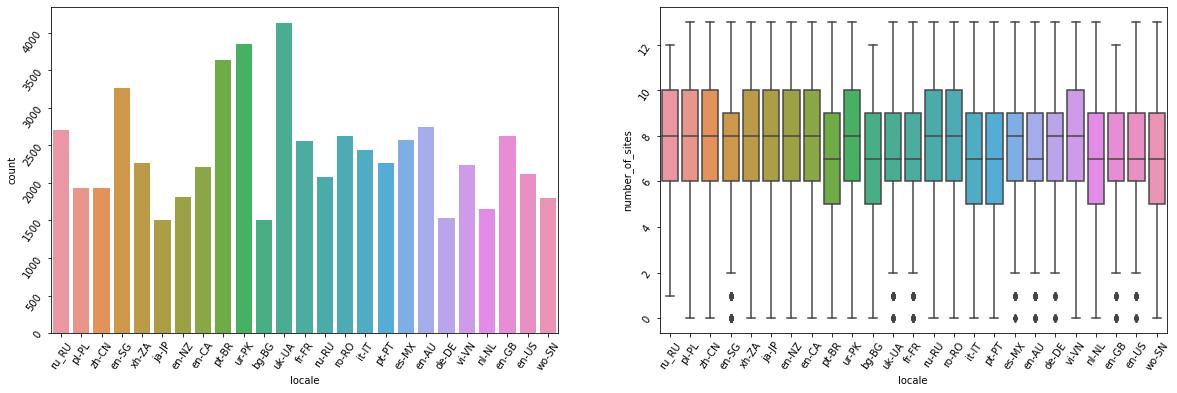

In [142]:
categorial_feature_overview('locale', 55)

gender has 0.0 % of null values


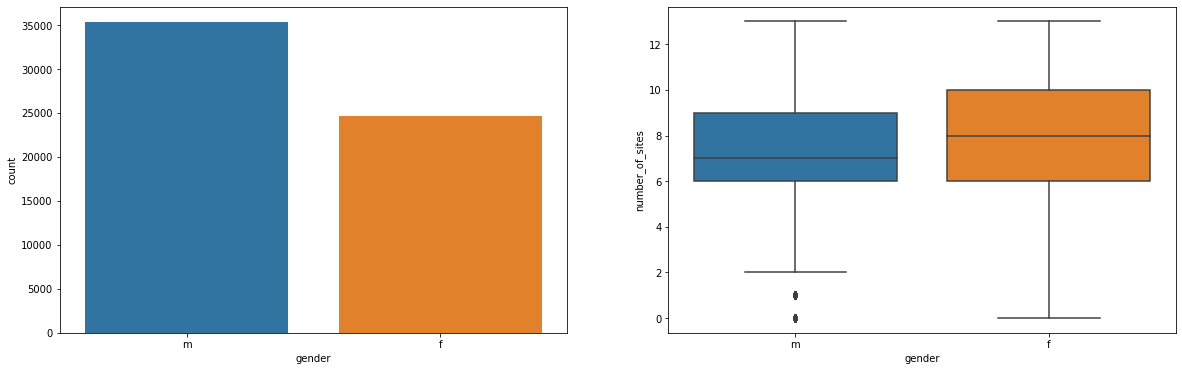

In [132]:
categorial_feature_overview('gender')

country has 0.0 % of null values


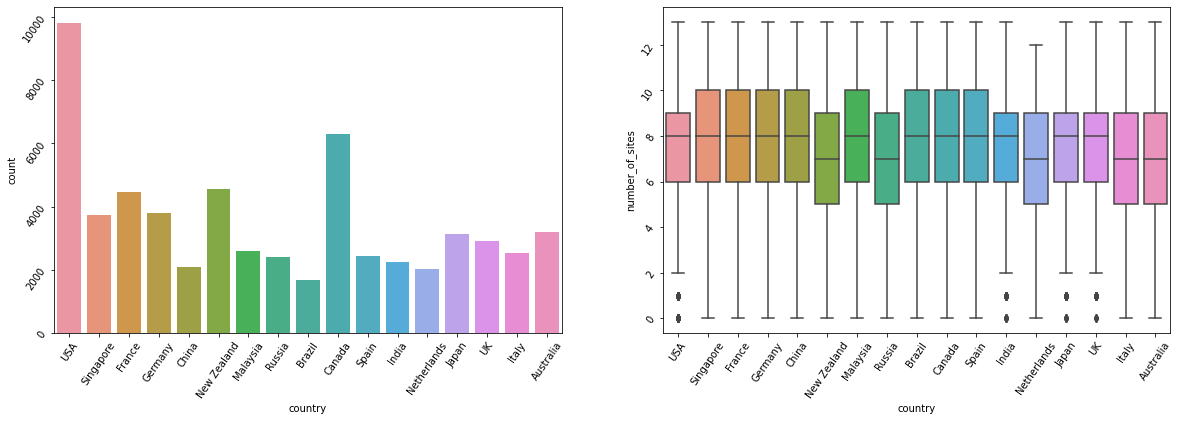

In [140]:
categorial_feature_overview('country', 55)

city has 0.0 % of null values


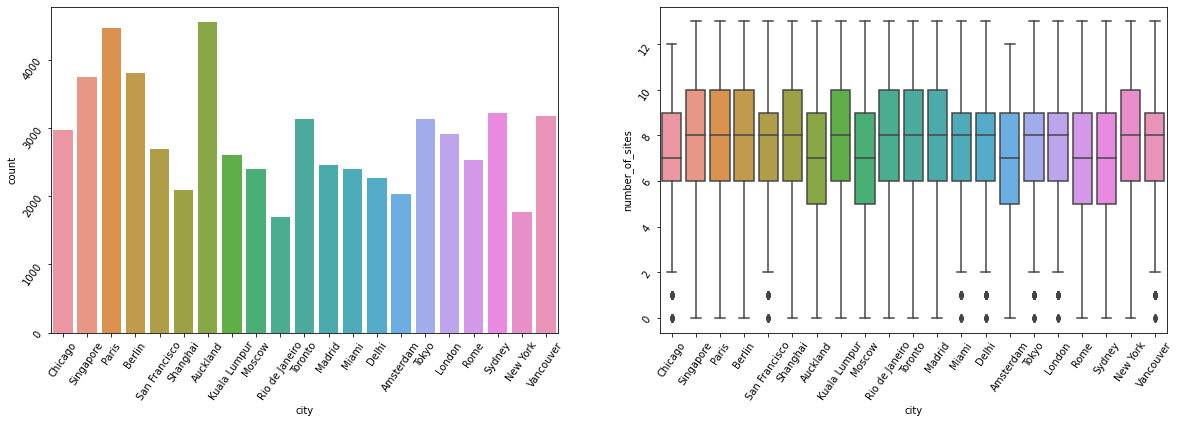

In [141]:
categorial_feature_overview('city', 55)